# Section 2.1 Distributions

In [6]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
from scipy import stats

UsageError: Line magic function `%matplotiib` not found.


In [2]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 8265
np.random.seed(RANDOM_SEED)

# Distributions
A range of values and the relative occurrence, or belief, in each value

# Let's start with an observed point

In [3]:
observation = ["cow"]

Not much to see here

# Observed distribution
What we have seen and how much of each 

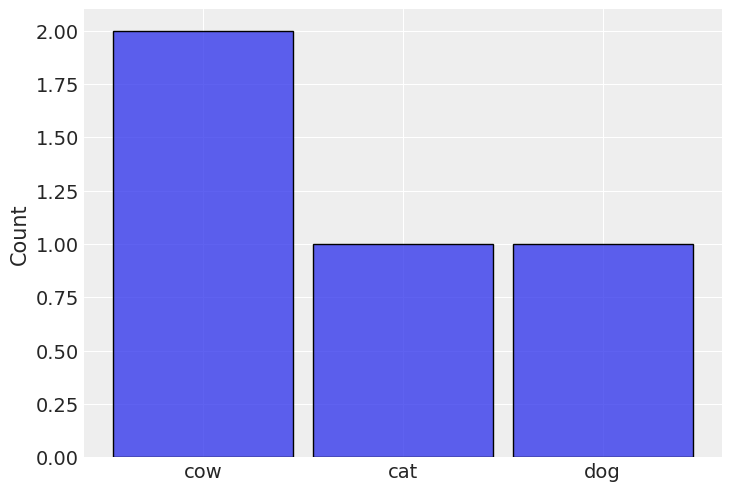

In [4]:
observations = ["cow", "cow", "cat", "dog"]
sns.histplot(observations, shrink=.9);

# That's for things we can observe
What about things we can't directly observe, like estimates?

# Expressing a single belief with point estimates 
Point estimates are what they sound like, an estimate of a single point describing a dataset

Examples include
* Mean
* Median
* Standard Deviation
* Quantile

For example if we observe the values  
`observations = [2,2,4,6]`  
we could estimate the true population mean to be 3.5


# Expressing infinite beliefs with distributions

In [1]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)


In [9]:
mean_belief = stats.norm(3, 2)
x = np.linspace(-3, 9)
y = mean_belief.pdf(x)

fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)
ax.set_yticks([])
ax.set_title("Distribution of beliefs", fontsize=30)
ax.set_xlabel("Mean value", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)


<img src="img/MeanBelief.png?modified=12345677" width=100% style="margin-left:auto; margin-right:auto">

# Distributions can be used to describe many things
* The values of things we can directly observe
* Our beliefs in the parameters of other distributions
    * An example is Uniform distribution used to describe possible means for a Normal distribution
* Probabilities which are a *special case* of distributions
    * These distributions can only sum to 1

# Formalizing the intuition
The intuitive description is enough to get the general idea of distributions 

but we do need to be much more specific if we are to perform calculations

# Specification with math notation: Mean point estimate

$$
\LARGE
\bar{Y} = \frac{\sum_{N}^{i=0}Y_i}{N}
$$

This is the way it's been done for thousands of years prior to computers

# Specification with math notation: Normal Distribution
$$
\LARGE
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

In [6]:
μ, σ = 0, 3
x = 0
1 / (σ * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((x - μ) / σ) ** 2)

0.1329807601338109

This is hos we calculate the the height for a Normal Probability Distribution with Mean 0 and Standard Deviation 3.

What this means exactly will be covered in another lesson.

#  Specification with code: Normal Distribution
Code is how we will be specifying distributions in this course

In [7]:
μ, σ = 0, 3
x = 0
scipy.stats.norm(μ, σ).pdf(x)

0.1329807601338109

Specifying distributions with code enables computation which will confer many advantages, notably "easy" sampling

*The idea of sampling is fundamental to this course and will be covered in more detail in its own section*

# Lesson Summary
* Distributions specify the relative frequency of observations, or relative belief, "of things"
* Distributions can describe many things, such as probability, observations, other parameters
    * Probability distributions are a special case of distributions
* We will be specifying and interacting with distributions primarily through code in this course